<a href="https://colab.research.google.com/github/Rahul711sharma/Classification-ML/blob/main/Insurance_Decisioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more. 

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

## <b>In this self project, you are required to do </b>

* ### Perform exploratory data analysis
* ### Build logistic regression, random forest, gradient boosted decision trees and xgboost models
* ### Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

## <b>Some of the guidelines for the project :</b>
* ### Describe in detail each of the experiments 
* ### Include plots and charts
* ### Draw the final conclusion on the basis of comparison of different models. 

# <b><u>Variable Description 

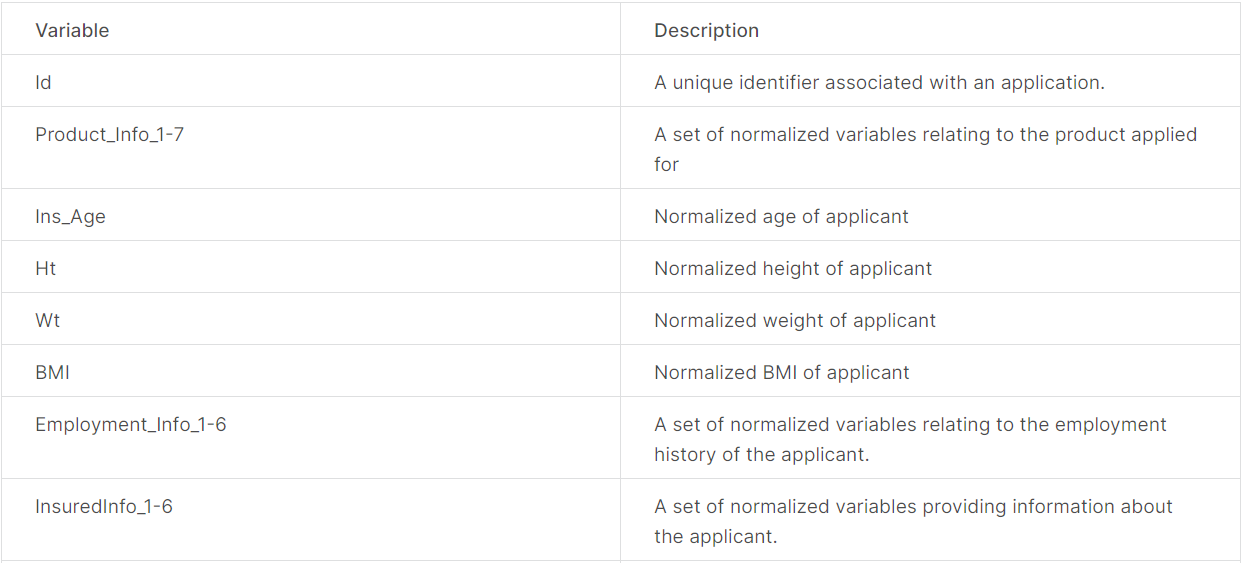

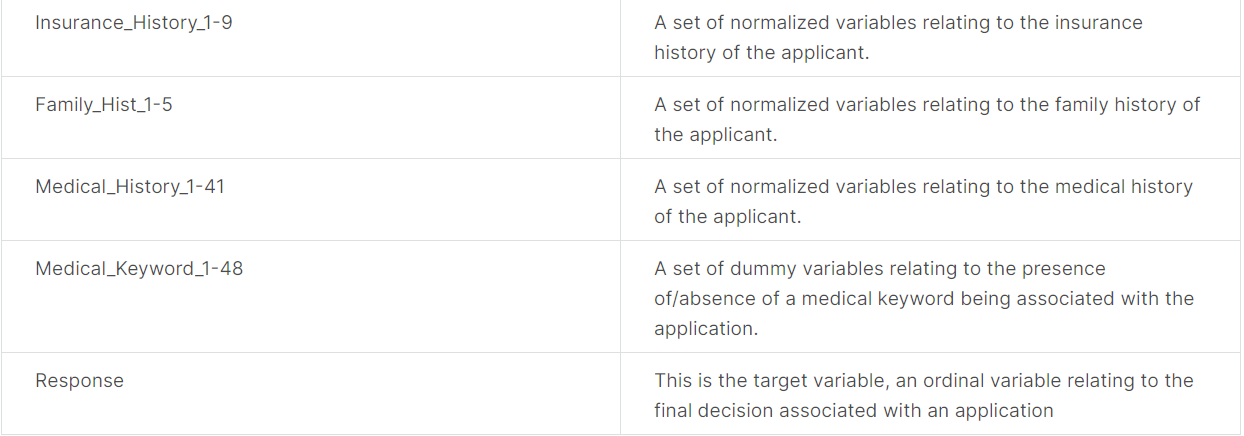

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix,accuracy_score,average_precision_score,roc_auc_score,roc_curve
from sklearn import ensemble

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
train = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")

##Preprocessing and EDA

In [59]:
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [60]:
pd.options.display.max_rows=2000

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [62]:
len(train)

59381

In [63]:
#droping variables with more than 30% NA

missing_values = train.isnull().sum()/len(train)
missing_thresh=missing_values[missing_values>0.3]
missing_thresh

Insurance_History_5    0.427679
Family_Hist_2          0.482579
Family_Hist_3          0.576632
Family_Hist_4          0.323066
Family_Hist_5          0.704114
Medical_History_10     0.990620
Medical_History_15     0.751015
Medical_History_24     0.935990
Medical_History_32     0.981358
dtype: float64

In [64]:
missing_thresh.index

Index(['Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3',
       'Family_Hist_4', 'Family_Hist_5', 'Medical_History_10',
       'Medical_History_15', 'Medical_History_24', 'Medical_History_32'],
      dtype='object')

In [65]:
for i in missing_thresh.index:
  train.drop(i,axis=1,inplace=True)
train.isnull().sum()/len(train)




Id                     0.000000
Product_Info_1         0.000000
Product_Info_2         0.000000
Product_Info_3         0.000000
Product_Info_4         0.000000
Product_Info_5         0.000000
Product_Info_6         0.000000
Product_Info_7         0.000000
Ins_Age                0.000000
Ht                     0.000000
Wt                     0.000000
BMI                    0.000000
Employment_Info_1      0.000320
Employment_Info_2      0.000000
Employment_Info_3      0.000000
Employment_Info_4      0.114161
Employment_Info_5      0.000000
Employment_Info_6      0.182786
InsuredInfo_1          0.000000
InsuredInfo_2          0.000000
InsuredInfo_3          0.000000
InsuredInfo_4          0.000000
InsuredInfo_5          0.000000
InsuredInfo_6          0.000000
InsuredInfo_7          0.000000
Insurance_History_1    0.000000
Insurance_History_2    0.000000
Insurance_History_3    0.000000
Insurance_History_4    0.000000
Insurance_History_7    0.000000
Insurance_History_8    0.000000
Insuranc

In [66]:
#filling NAs for other variables
for i in train.columns:
  train[i].fillna(0,inplace=True)

train.isna().sum()

Id                     0
Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
Medical_History_1      0
Medical_History_2      0
Medical_History_3      0
Medical_History_4      0
Medical_History_5      0
Medical_History_6      0
Medical_History_7      0


In [67]:
for i in train.columns:
  print(f"{i}: \n\n {train[i].value_counts()} \n")

Streaming output truncated to the last 5000 lines.
0.028500       7
0.013200       7
0.650000       7
0.039600       7
0.540000       7
0.020800       7
0.192000       7
0.043500       7
0.001500       7
0.035360       7
0.010800       7
0.022500       7
0.006500       6
0.039500       6
0.248000       6
0.232000       6
0.062400       6
0.178000       6
0.023400       6
0.420000       6
0.057500       6
0.007800       6
0.035500       6
0.029500       6
0.277000       6
0.174000       6
0.153000       6
0.063500       6
0.054500       6
0.080016       6
0.040500       6
0.045600       6
0.071500       6
0.198000       6
0.058500       6
0.186000       6
0.245000       6
0.073500       6
0.057200       6
0.030500       6
0.900000       6
0.079500       6
0.067500       6
0.212000       5
0.072800       5
0.013500       5
0.061500       5
0.002400       5
0.033800       5
0.169000       5
0.045760       5
0.004500       5
0.000600       5
0.189000       5
0.010500       5
0.027600      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


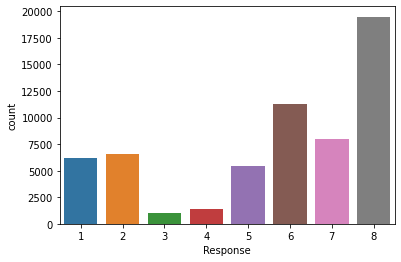

In [68]:
sns.countplot(train['Response'])

In [69]:
def modified_response(row):
  if ((row['Response'] <=7) & (row['Response'] >=0) ):
    val = 0
  elif (row['Response']==8):
    val = 1
  else:
    val = -1
  
  return val

In [70]:
train['Response'] = train.apply(modified_response,axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


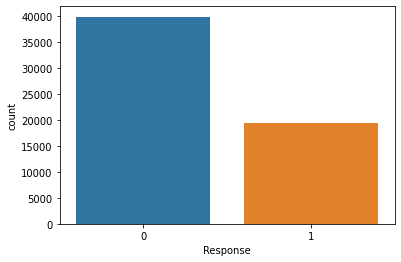

In [71]:
sns.countplot(train['Response'])

In [72]:
#finding data types in the dataset
for i in train.columns:
  print(f"{i}: \n {type(train[i][0])} \n")


Id: 
 <class 'numpy.int64'> 

Product_Info_1: 
 <class 'numpy.int64'> 

Product_Info_2: 
 <class 'str'> 

Product_Info_3: 
 <class 'numpy.int64'> 

Product_Info_4: 
 <class 'numpy.float64'> 

Product_Info_5: 
 <class 'numpy.int64'> 

Product_Info_6: 
 <class 'numpy.int64'> 

Product_Info_7: 
 <class 'numpy.int64'> 

Ins_Age: 
 <class 'numpy.float64'> 

Ht: 
 <class 'numpy.float64'> 

Wt: 
 <class 'numpy.float64'> 

BMI: 
 <class 'numpy.float64'> 

Employment_Info_1: 
 <class 'numpy.float64'> 

Employment_Info_2: 
 <class 'numpy.int64'> 

Employment_Info_3: 
 <class 'numpy.int64'> 

Employment_Info_4: 
 <class 'numpy.float64'> 

Employment_Info_5: 
 <class 'numpy.int64'> 

Employment_Info_6: 
 <class 'numpy.float64'> 

InsuredInfo_1: 
 <class 'numpy.int64'> 

InsuredInfo_2: 
 <class 'numpy.int64'> 

InsuredInfo_3: 
 <class 'numpy.int64'> 

InsuredInfo_4: 
 <class 'numpy.int64'> 

InsuredInfo_5: 
 <class 'numpy.int64'> 

InsuredInfo_6: 
 <class 'numpy.int64'> 

InsuredInfo_7: 
 <class 'n

``Product_Info_2`` is of string type

In [73]:
train['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

``Product_Info_2`` has so many categories so it's good to just remove this column

In [74]:
train.drop('Product_Info_2',axis=1,inplace=True)

## Logistic Regression Model

In [75]:
y = train['Response']
x=train.drop('Response',axis=1)
print(x.shape,y.shape)

(59381, 117) (59381,)


In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(44535, 117)
(44535,)
(14846, 117)
(14846,)


In [77]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression(max_iter=10000)
logit.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
logit.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [79]:
#model performace with training data

train_pred = logit.predict(x_train)

pd.pivot_table(pd.DataFrame({'y_train':y_train,'prediction':train_pred}),index=y_train,columns=train_pred,aggfunc='count')

prediction       y_train      
                  0     1       0     1
Response                               
0             26671  3199   26671  3199
1             10357  4308   10357  4308

In [30]:
print(confusion_matrix(y_train,train_pred))
print(accuracy_score(y_train,train_pred))
print(roc_auc_score(y_train,train_pred))

[[26746  3162]
 [10485  4142]]
0.6935668575277871
0.5887253647449499


In [31]:
#score with test data
test_pred =logit.predict(x_test)

print(confusion_matrix(y_test,test_pred))
print(accuracy_score(y_test,test_pred))

[[8947 1037]
 [3544 1318]]
0.6914320355651354


####Cross Validation logistic regression


In [32]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import  cross_validate

In [33]:
logistic = LogisticRegression(max_iter=10000)


In [34]:
scoring = ['accuracy']
scores = cross_validate(logistic,x_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. , accuracy=(train=0.740, test=0.743), total=   7.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV] ............. , accuracy=(train=0.724, test=0.719), total=   2.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.3s remaining:    0.0s


[CV] ............. , accuracy=(train=0.724, test=0.731), total=   4.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.5s remaining:    0.0s


[CV] ............. , accuracy=(train=0.721, test=0.719), total=   3.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.0s remaining:    0.0s


[CV] ............. , accuracy=(train=0.724, test=0.723), total=   3.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.4s finished


In [35]:
scores['train_accuracy']

array([0.73986752, 0.72434602, 0.72356012, 0.72142697, 0.72353205])

In [36]:
scores['test_accuracy']

array([0.7426743 , 0.71876053, 0.73099809, 0.71909734, 0.72280229])

##Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [39]:
#predictions on train Data

decision_tree_pred = classifier.predict(x_train)
print(accuracy_score(y_train,decision_tree_pred))


0.8002245424946671


In [40]:
#prediction on test data
test_pred_dt = classifier.predict(x_test)
print(accuracy_score(y_test,test_pred_dt))

0.8012932776505456


###Visualize Decision Tree


In [41]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

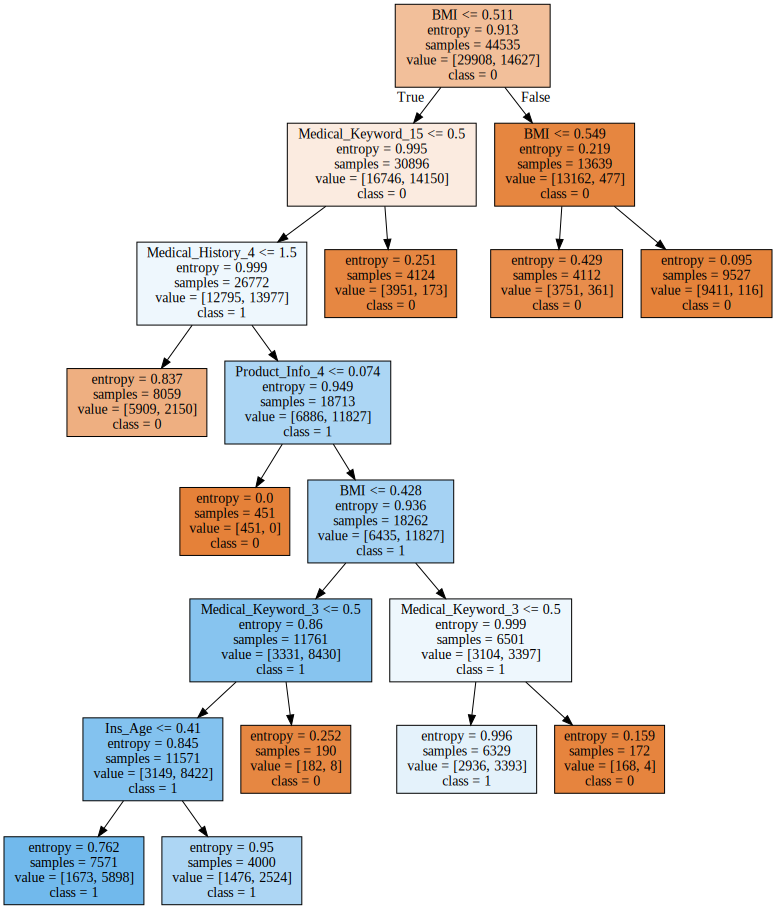

In [42]:
graph = Source(tree.export_graphviz(classifier, out_file=None, feature_names=x_train.columns, class_names=['0', '1'], filled = True))
display(SVG(graph.pipe(format='svg')))

##Ensembles

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
#number of trees
n_estimators = [50,80,100]

#Maximum depth of tree
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [45]:
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.5s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.5s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  8.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [46]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 100}

In [47]:
rf_grid.best_score_

0.8077467160660156

In [48]:
# Random search CV

#number of trees
n_estimators = np.arange(10,100)

#Maximum depth of tree
max_depth = np.arange(4,15)

# Minimum number of samples required to split a node
min_samples_split = np.arange(70,200)

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

param_dict2 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [49]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [50]:
rf_model2 = RandomForestClassifier()
rf_random_search = RandomizedSearchCV(rf_model2 ,cv=7 ,scoring='accuracy', param_distributions=param_dict,verbose=2)
rf_random_search.fit(x_train,y_train)


Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   1.0s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   1.0s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   1.0s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   1.1s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   1.0s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   1.0s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   1.0s
[CV] n_estimators=50, min_samples_split=50, min_samp

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.4min finished


RandomizedSearchCV(cv=7, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [51]:
rf_random_search.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 150,
 'n_estimators': 50}

In [52]:
rf_random_search.best_score_

0.8081284422638031

In [84]:
train_pred_rf= rf_random_search.predict(x_train)
print(accuracy_score(y_train,train_pred_rf))


0.8052992028741439

In [87]:
#fitting test data

test_pred_rf = rf_random_search.predict(x_test)
print(accuracy_score(y_test,test_pred_rf))

0.8071534420045804


In [92]:
rf_random_search.best_estimator_.feature_importances_

array([1.21191472e-03, 1.68291497e-04, 6.45936867e-03, 3.74741887e-02,
       0.00000000e+00, 2.55710782e-04, 3.12196546e-05, 3.44111637e-02,
       1.33023363e-02, 1.89970492e-01, 2.05529660e-01, 2.85328960e-03,
       1.67535203e-03, 1.12203249e-03, 2.42042600e-04, 3.43858550e-03,
       2.10500413e-03, 4.00556670e-03, 3.24637176e-04, 4.52031153e-04,
       4.12554837e-04, 1.96897483e-04, 3.41375597e-02, 2.21207103e-03,
       1.36067938e-04, 2.48224794e-03, 3.71530213e-04, 5.58338364e-04,
       4.53064822e-04, 2.92037896e-04, 4.78877414e-04, 4.55200119e-03,
       5.44445431e-03, 2.40388260e-03, 2.24519160e-04, 9.38348502e-02,
       2.10539264e-04, 1.22722752e-02, 1.69070079e-05, 1.61051299e-04,
       3.68978781e-04, 0.00000000e+00, 9.30346409e-05, 2.71420561e-03,
       3.61513127e-05, 5.78226876e-03, 4.21329235e-04, 5.91169019e-04,
       8.92785274e-05, 1.46710209e-04, 1.27914582e-04, 2.25853187e-07,
       1.47810577e-01, 1.93737844e-04, 1.02730902e-04, 0.00000000e+00,
      

In [95]:
features_importance = pd.DataFrame({'features':x_train.columns,'Importance Scores':rf_random_search.best_estimator_.feature_importances_})

In [100]:
features_importance.sort_values(by='Importance Scores',inplace=True,ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


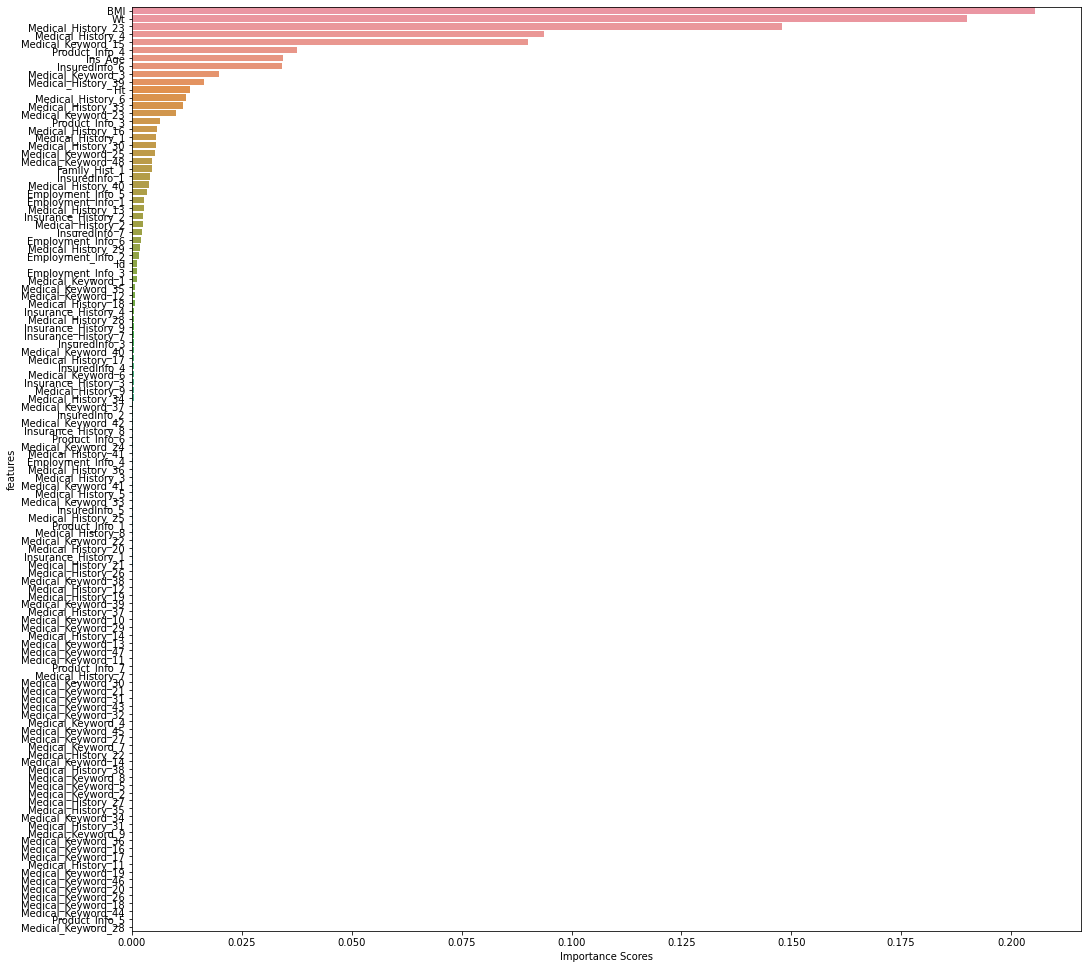

In [103]:
plt.figure(figsize=(17,17))
sns.barplot(features_importance['Importance Scores'],features_importance['features'])

####XGB model

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train,y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [89]:
train_pred_gb=gb_classifier.predict(x_train)
accuracy_score(y_train,train_pred_gb)

0.8277534523408555

In [90]:
test_pred_gb=gb_classifier.predict(x_test)
accuracy_score(y_test,test_pred_gb)


0.8238582783241277